# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini Project Notebook: Employee Attrition Prediction

## Problem Statement

[link text](https://)To predict employee attrition using CatBoost and XgBoost

## Learning Objectives

At the end of the experiment, you will be able to

* explore the employee attrition dataset
* apply CatBoost and XgBoost on the dataset
* tune the model hyperparameters to improve accuracy
* evaluate the model using suitable metrics


## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models.

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps.

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM.

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records.

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/wa_fn_usec_hr_employee_attrition_tsv.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


## Grading = 10 Points

### Install Required Dependencies

In [ ]:
# Install CatBoost
!pip -qq install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


### Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Please refer to the [ReadMe](https://drive.google.com/file/d/13XGmUlYT6etOBFgMbPLPCiW9wzx6pSQC/view?usp=sharing) before proceeding further.

# Part-A

## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [ ]:
# read the dataset
# YOUR CODE HERE
df = pd.read_csv("/content/wa_fn_usec_hr_employee_attrition_tsv.csv")
# df.head(20)

In [ ]:
# Check the shape of dataframe.
# YOUR CODE HERE
print(f' Shape -- {df.shape}')
print(f' Types -- \n{df.dtypes}')

 Shape -- (1470, 35)
 Types -- 
age                          int64
attrition                   object
businesstravel              object
dailyrate                    int64
department                  object
distancefromhome             int64
education                    int64
educationfield              object
employeecount                int64
employeenumber               int64
environmentsatisfaction      int64
gender                      object
hourlyrate                   int64
jobinvolvement               int64
joblevel                     int64
jobrole                     object
jobsatisfaction              int64
maritalstatus               object
monthlyincome                int64
monthlyrate                  int64
numcompaniesworked           int64
over18                      object
overtime                    object
percentsalaryhike            int64
performancerating            int64
relationshipsatisfaction     int64
standardhours                int64
stockoptionlevel       

## Data Exploration

- Check for missing values
- Check for features having consistent data across samples
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:**
>Use `for` to iterate through each column.

>For statistical description display - samples count, missing values count, range, and data type of each feature.

In [ ]:
# YOUR CODE HERE
print(df.describe())


print(f'Sample Count -- {df.count()}')

print(f'Mising Count -- {df.isnull().sum()}')

numerical_col = df.select_dtypes(include=['number']).columns.tolist()
categorical_col = df.select_dtypes(exclude=['number']).columns.tolist()
print(f' Numerical Col -- {numerical_col}, \n Categorical Col --{categorical_col}')

print(f'Range -- {df[numerical_col].max() - df[numerical_col].min()}')

print(f'Data types of each col -- {df.dtypes}')


# Alternate Approach

numerical_cols = []
categorical_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        numerical_cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        categorical_cols.append(column)

# Display numerical and categorical columns
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

# Display statistical description
print("\nStatistical Description:")
for column in df.columns:
    sample_count = df[column].count()
    missing_count = df[column].isnull().sum()
    data_range = (df[column].min(), df[column].max()) if pd.api.types.is_numeric_dtype(df[column]) else None
    data_type = df[column].dtype

    print(f"Column: {column}")
    print(f" - Sample Count: {sample_count}")
    print(f" - Missing Values Count: {missing_count}")
    print(f" - Range: {data_range}")
    print(f" - Data Type: {data_type}")
    print()

# Remove missing values
df_cleaned = df.dropna()

print("DataFrame after removing missing values:")
print(df_cleaned)




               age    dailyrate  distancefromhome    education  employeecount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       employeenumber  environmentsatisfaction   hourlyrate  jobinvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

**Exercise 3: Create a box plot to check for outliers [0.5 Mark]**

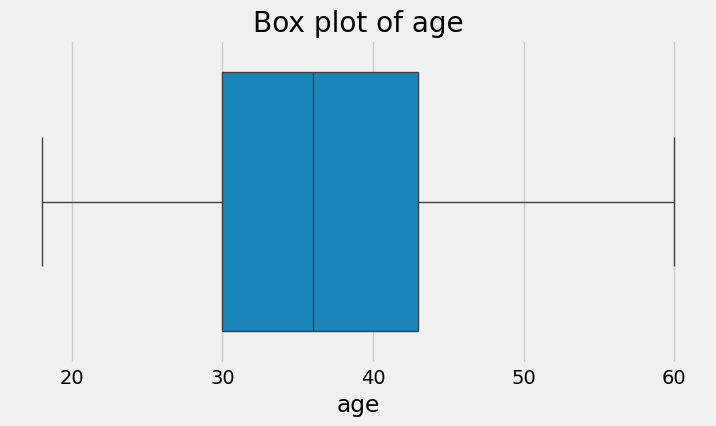

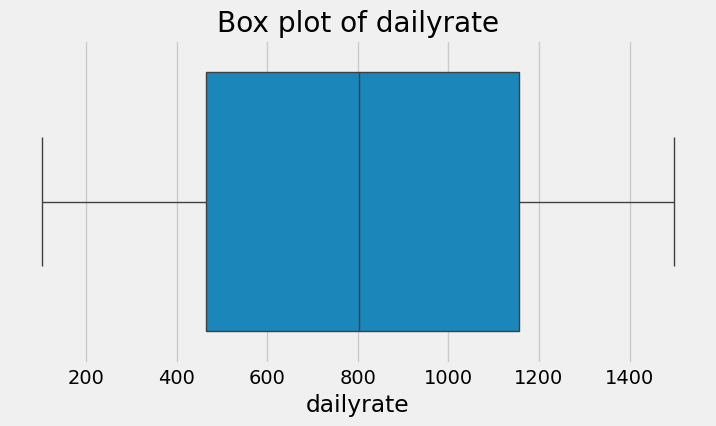

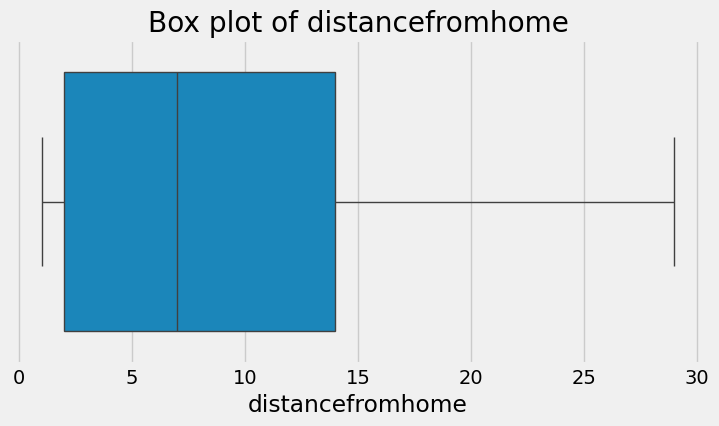

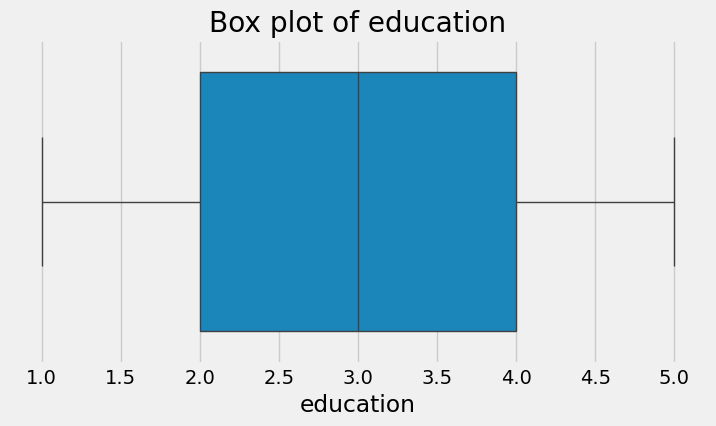

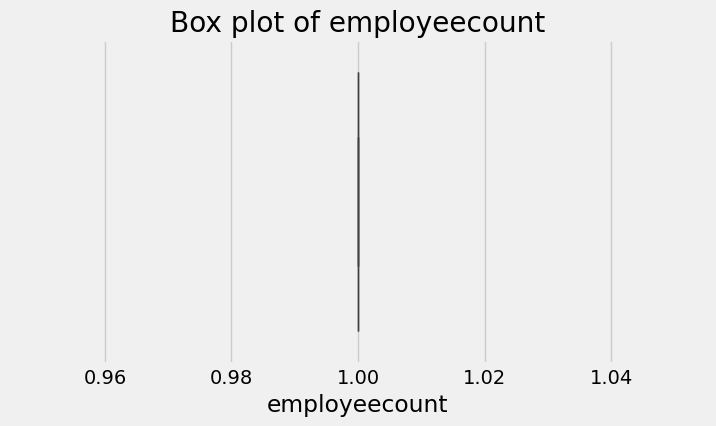

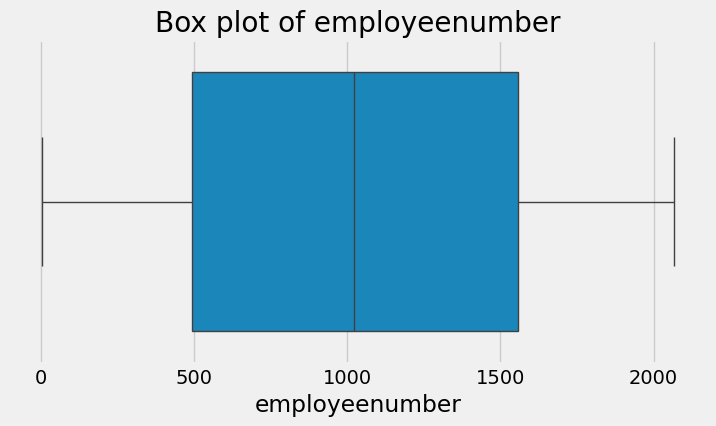

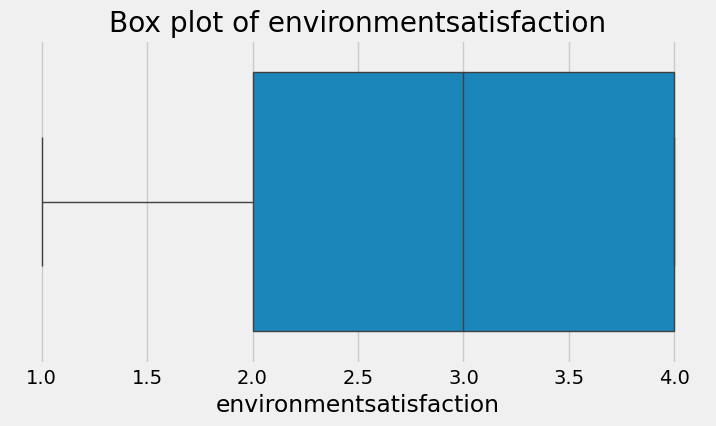

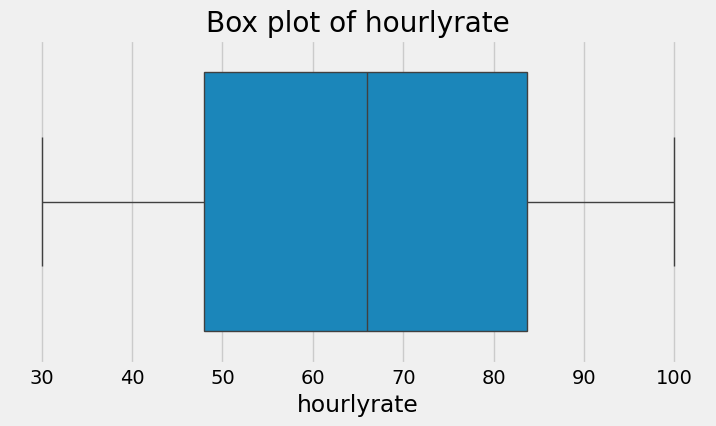

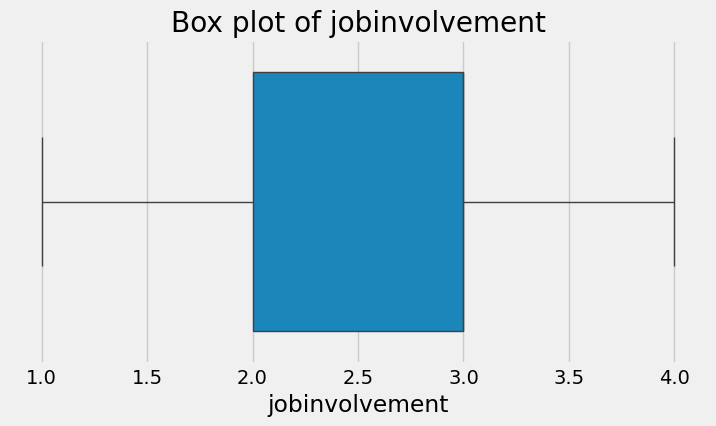

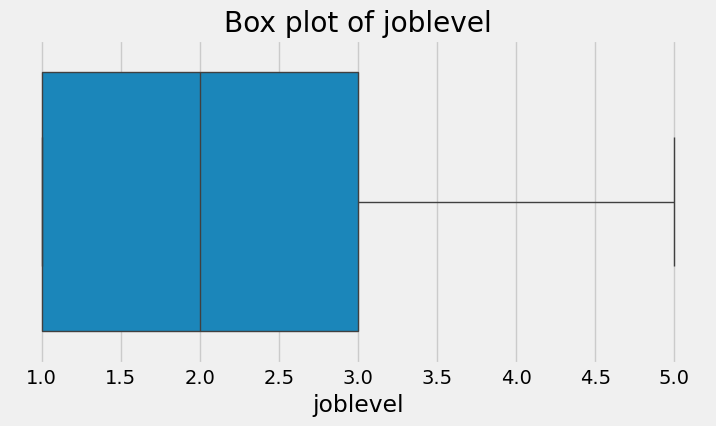

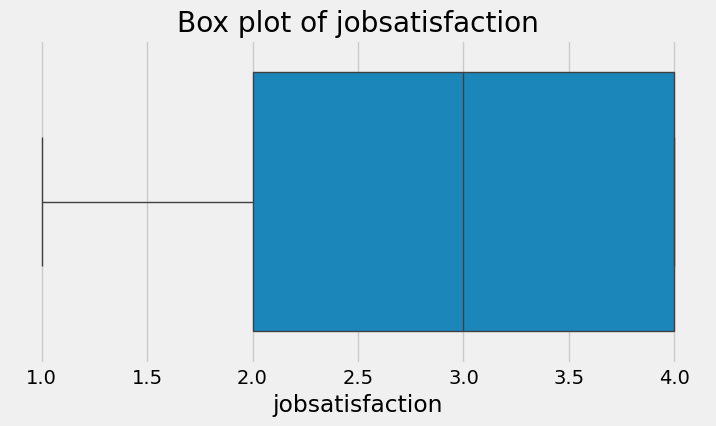

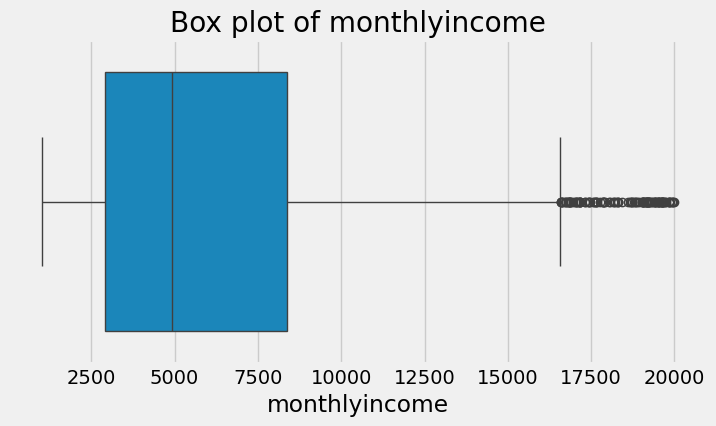

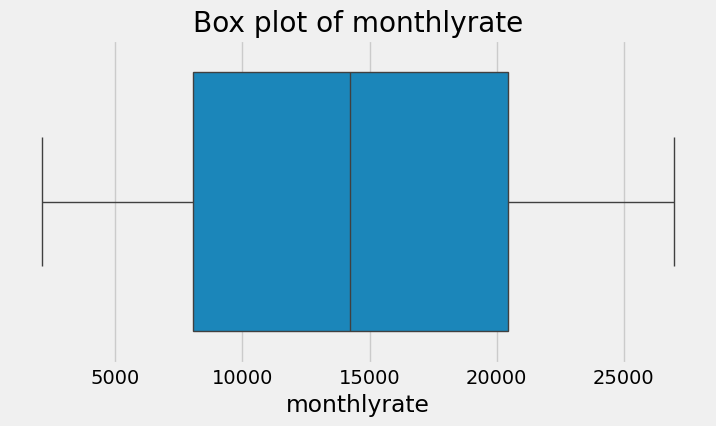

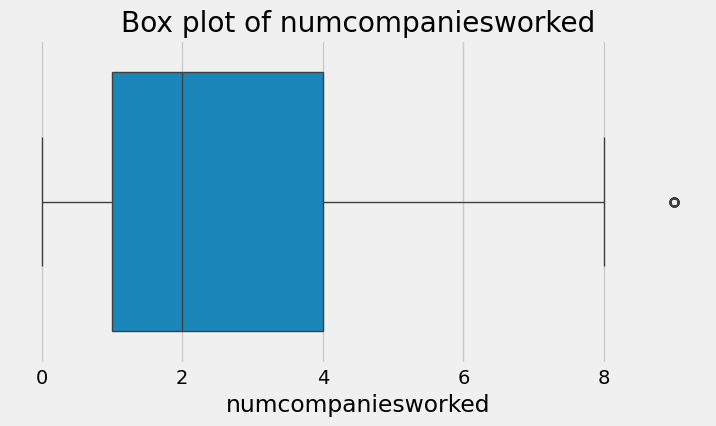

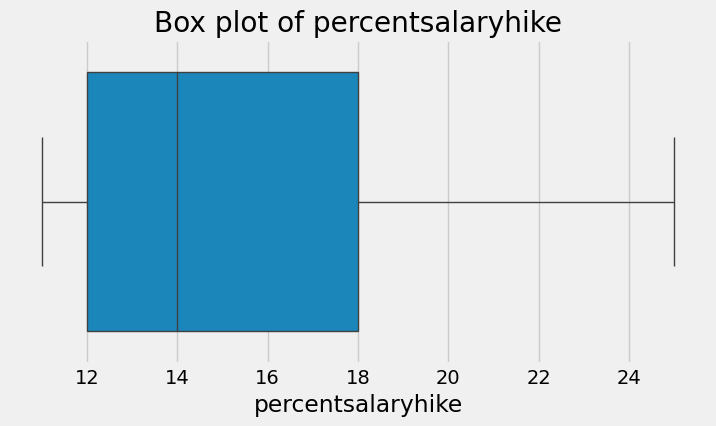

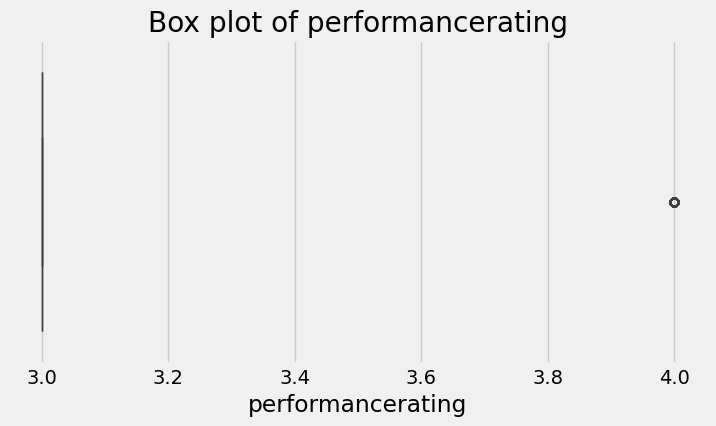

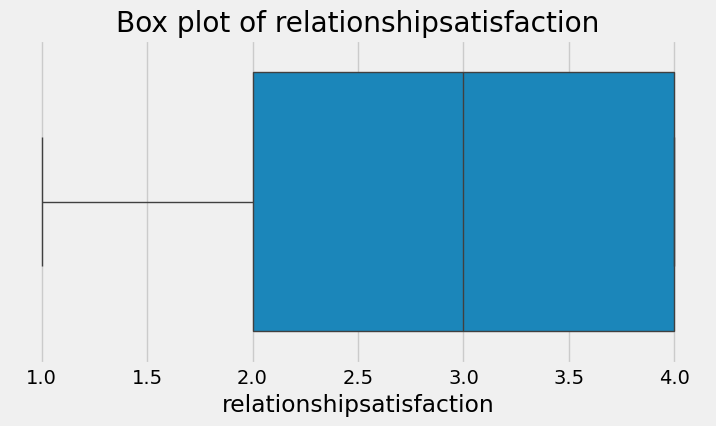

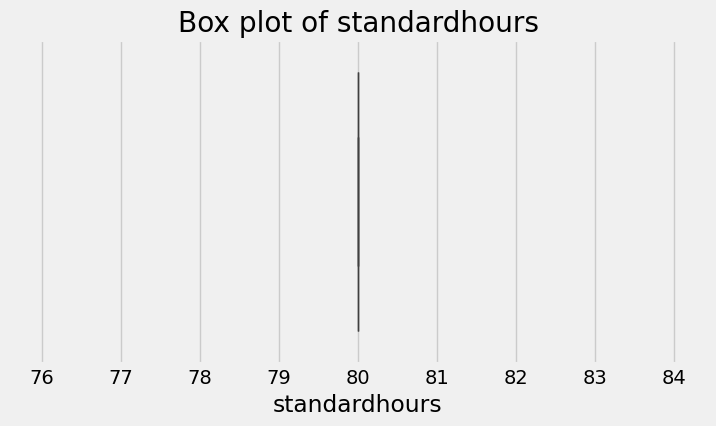

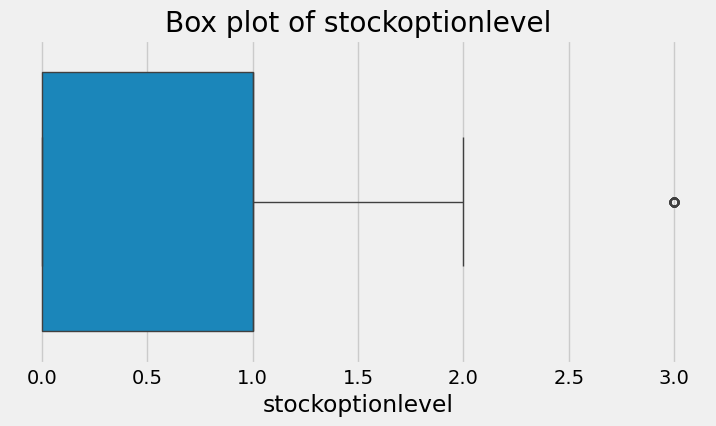

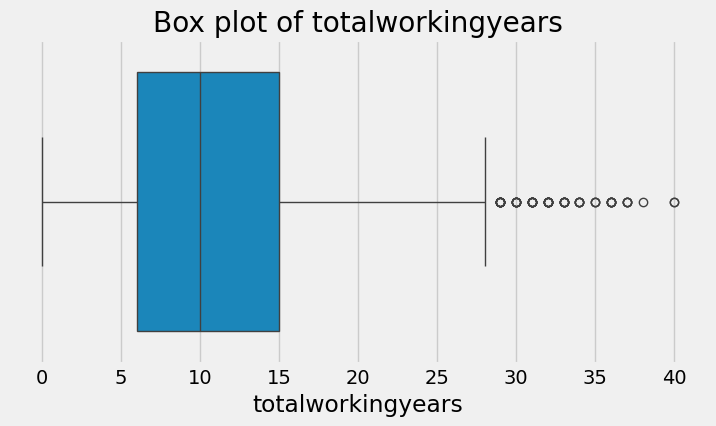

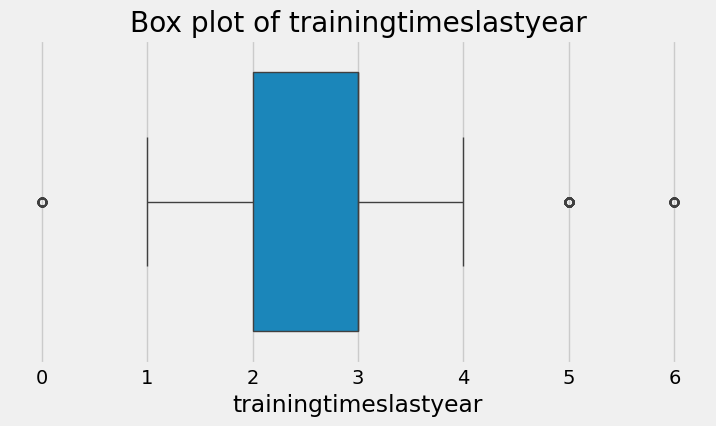

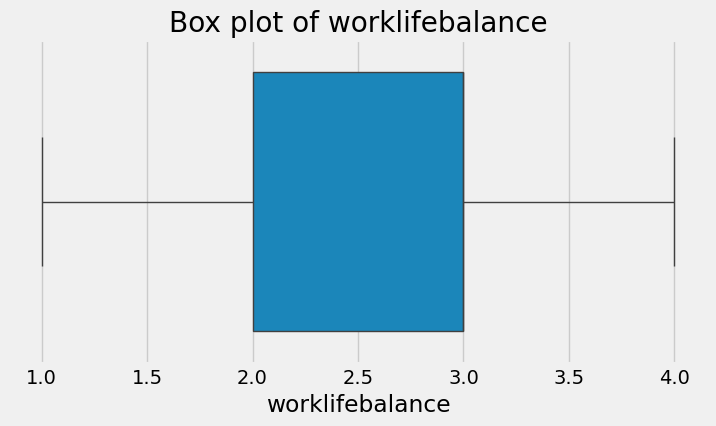

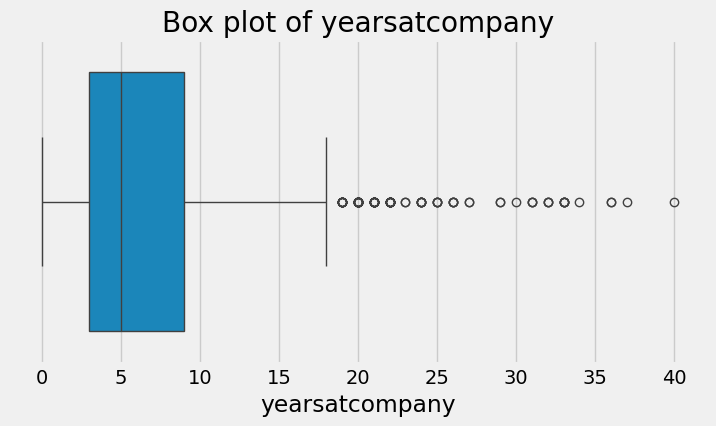

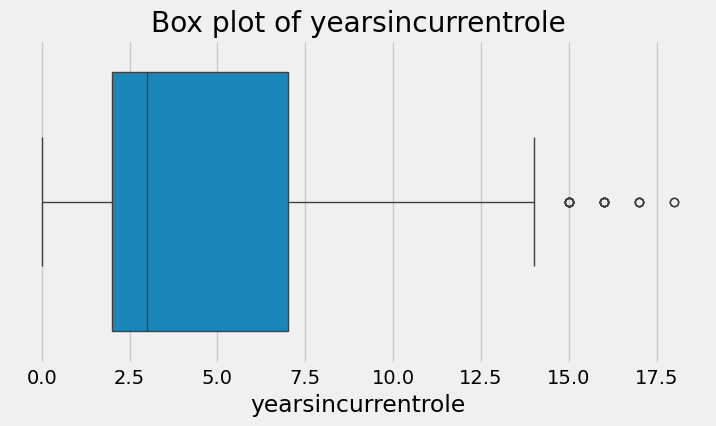

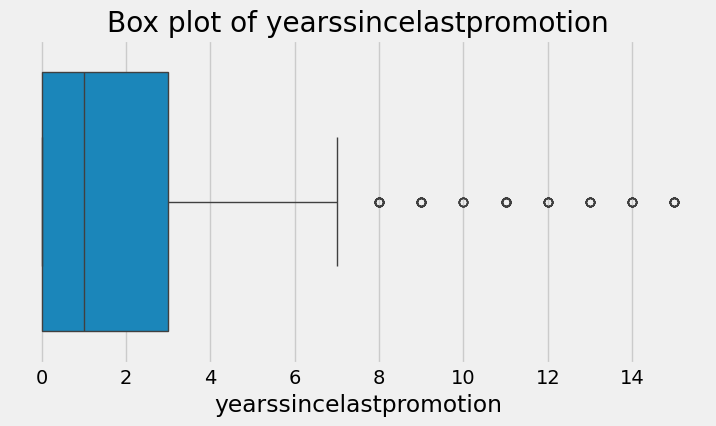

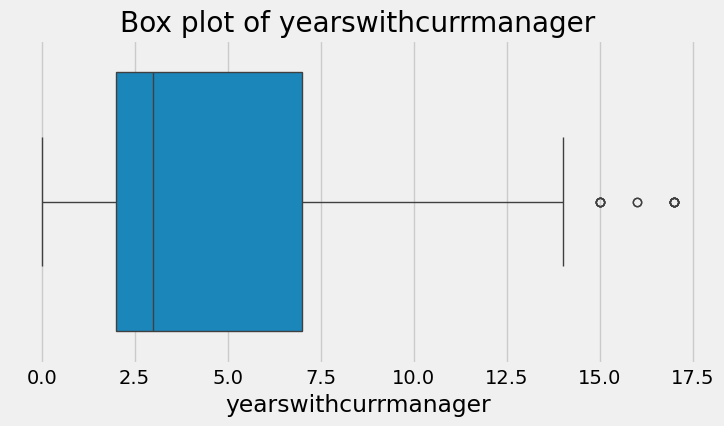

In [ ]:
# Check for outliers
# YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through numerical columns to create box plots
for col in numerical_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()




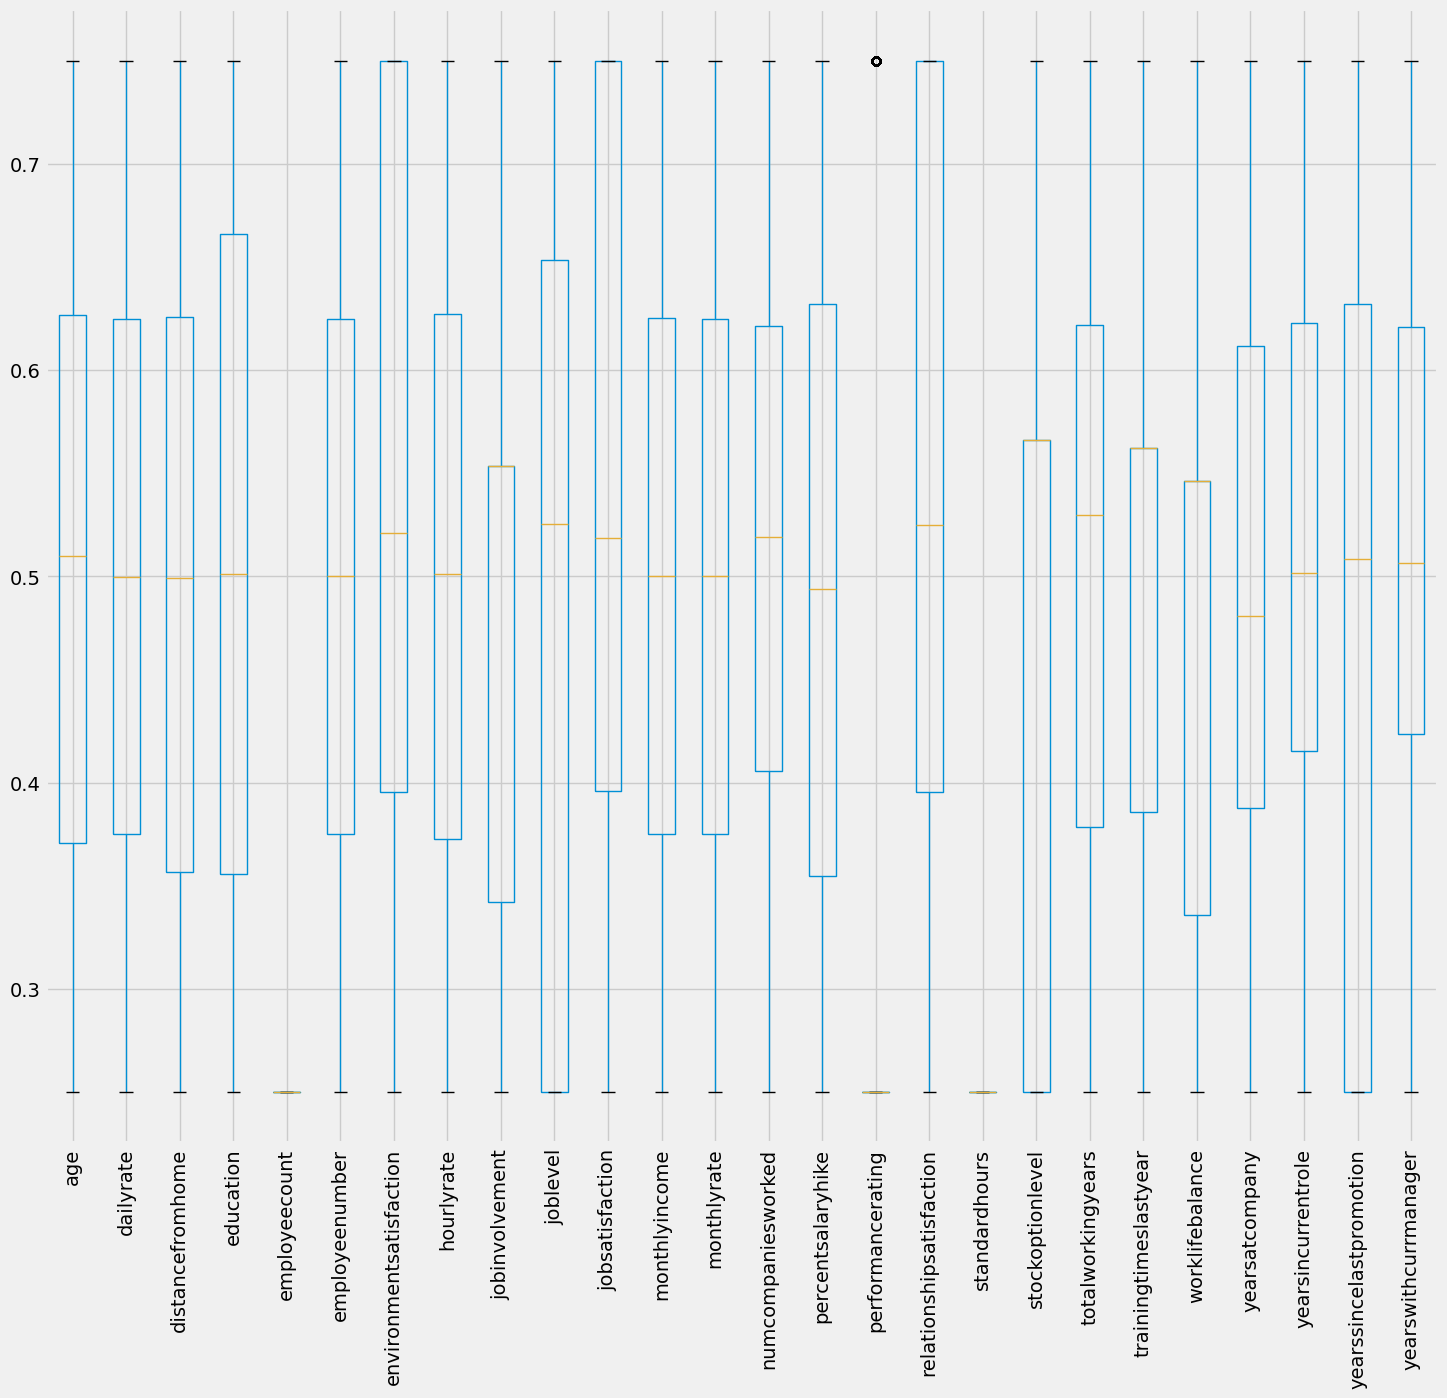

In [ ]:
#Alternate Approach, all the plots at same time
boxplot = df.boxplot(rot = 90, figsize=(16,14))
plt.show()

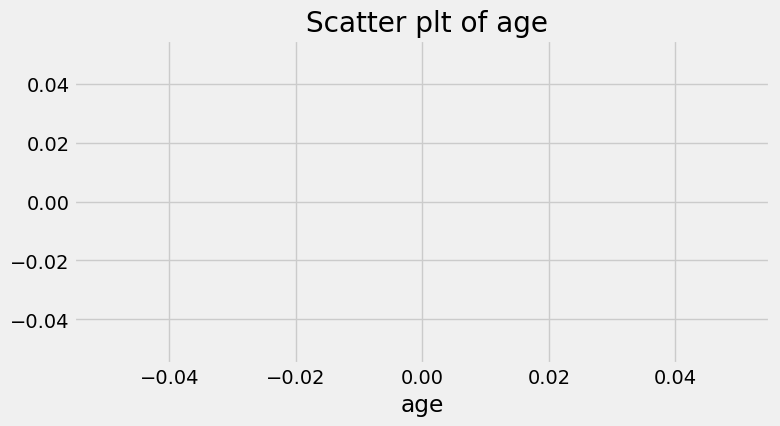

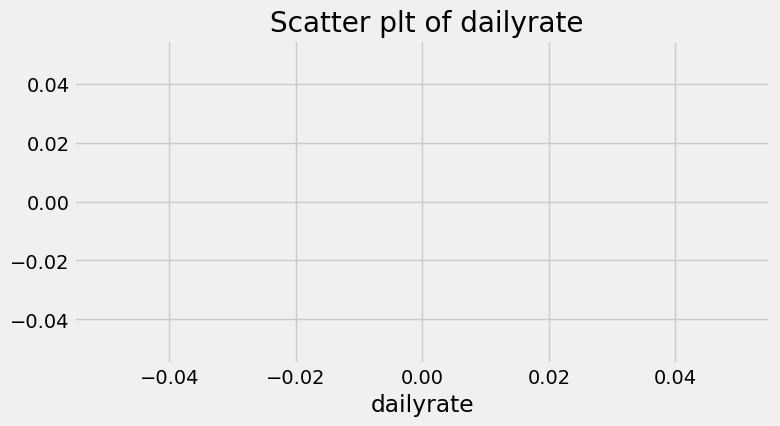

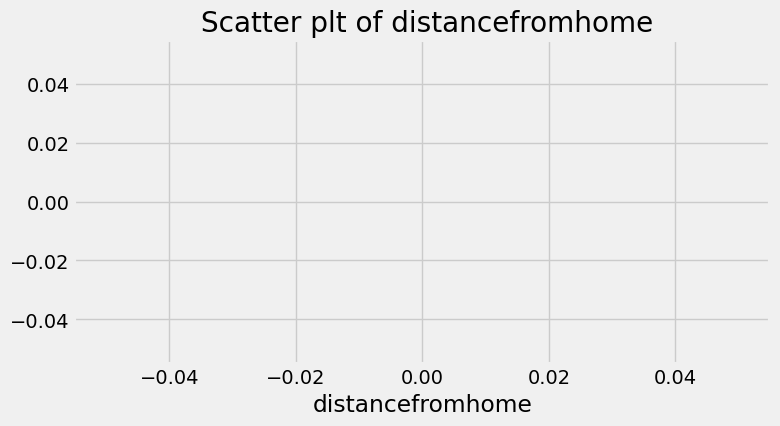

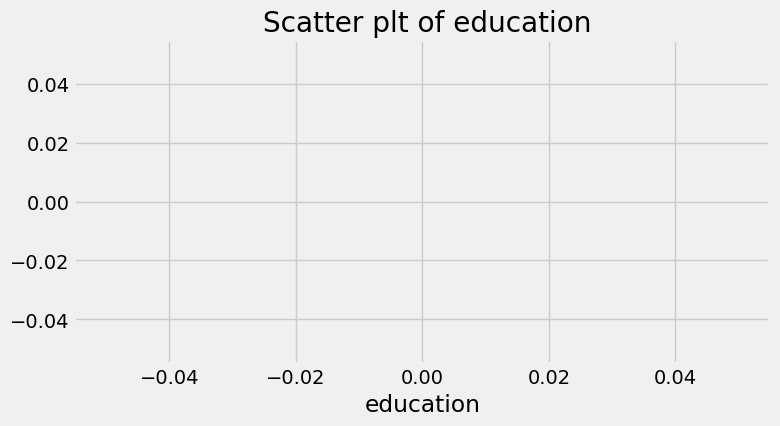

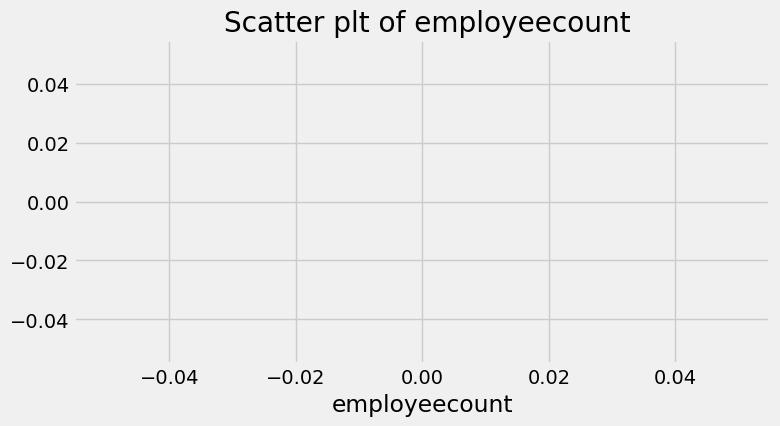

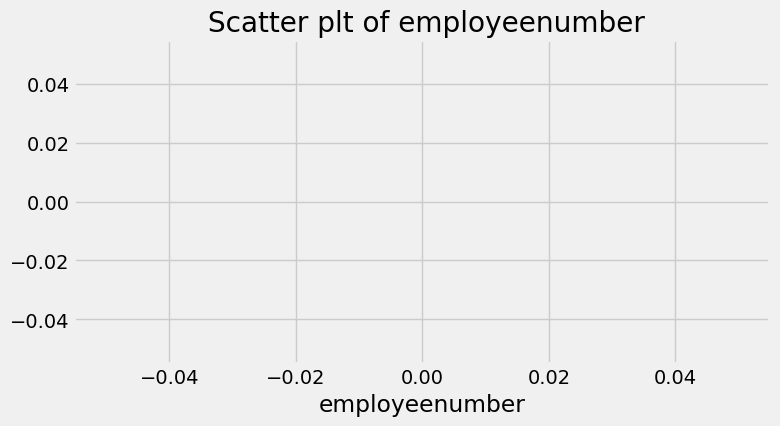

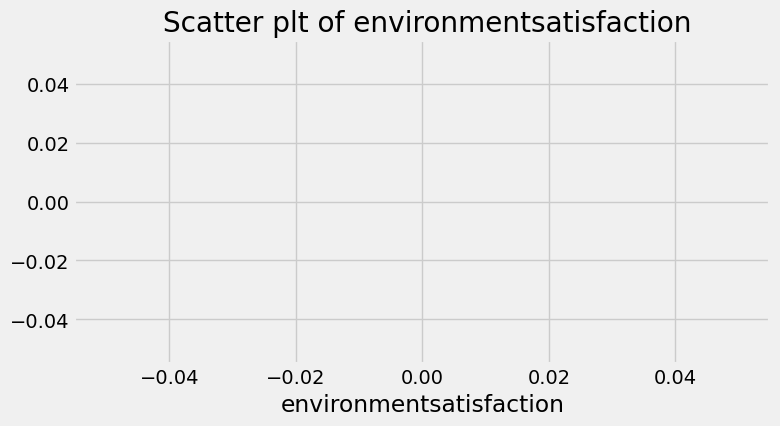

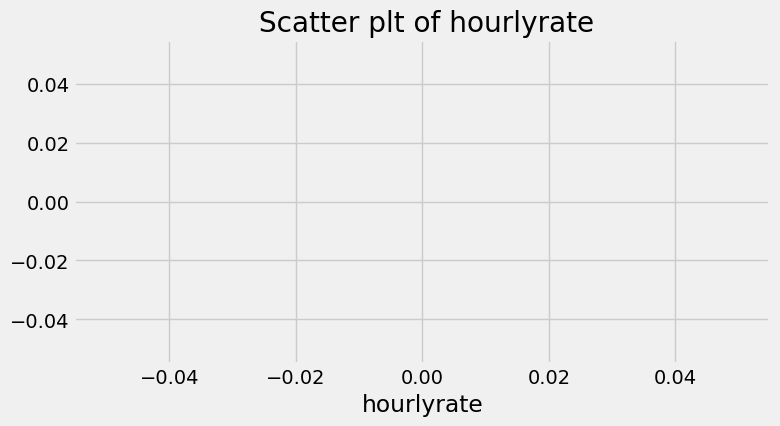

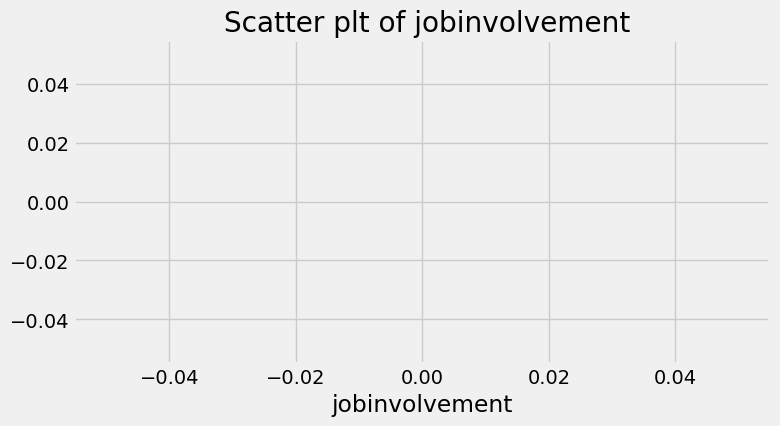

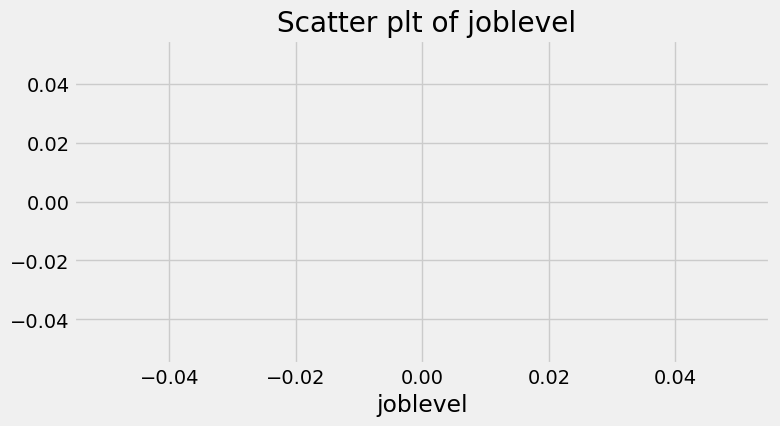

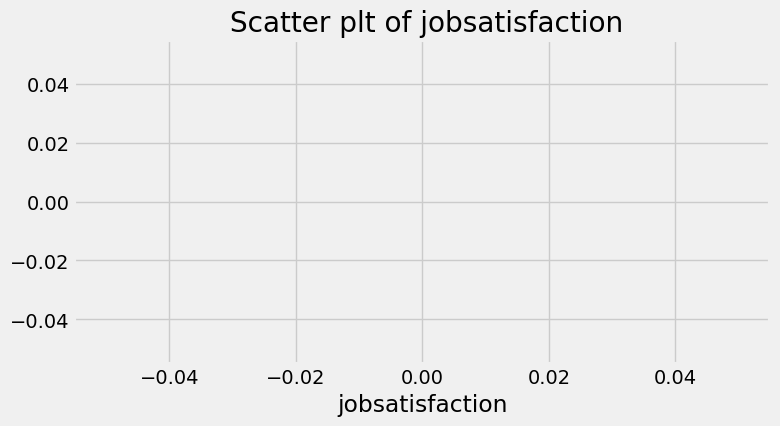

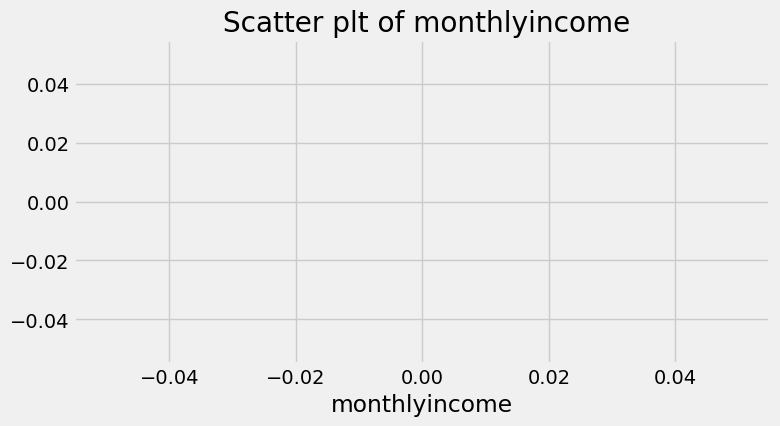

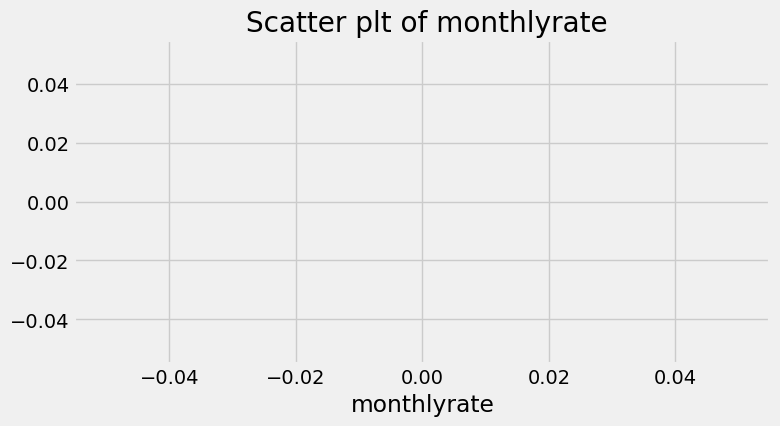

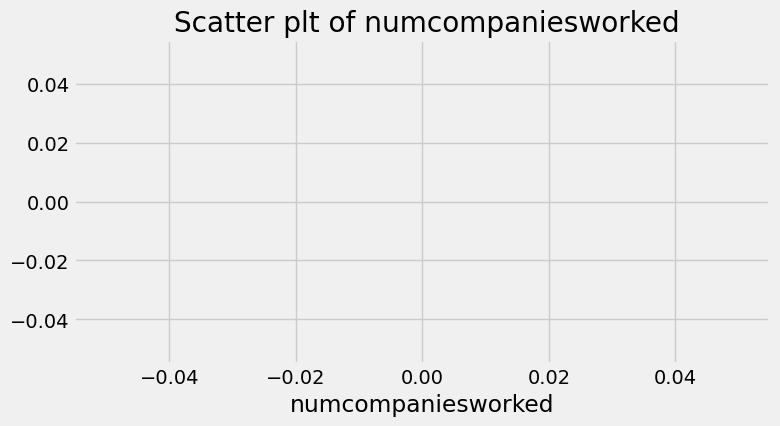

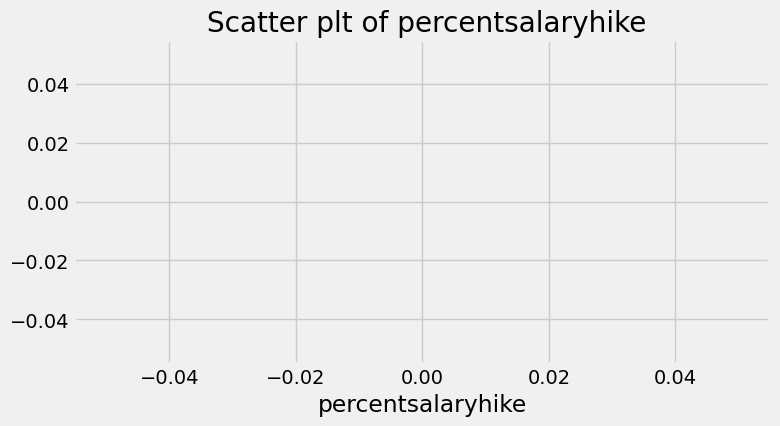

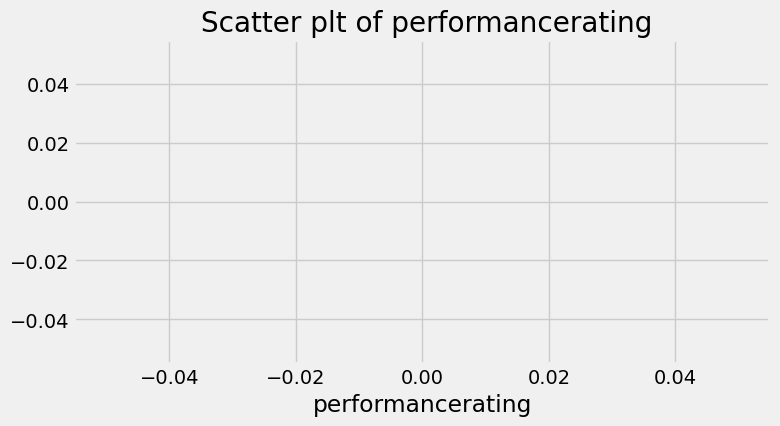

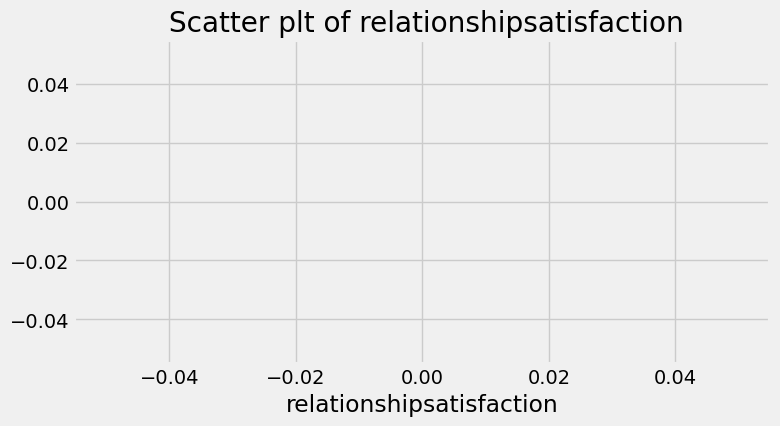

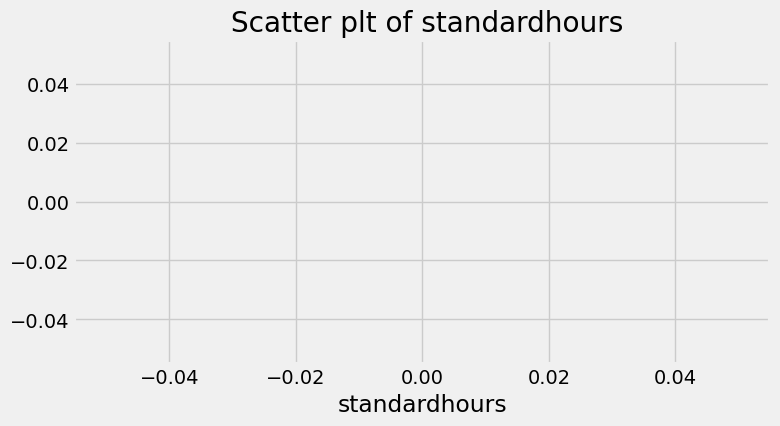

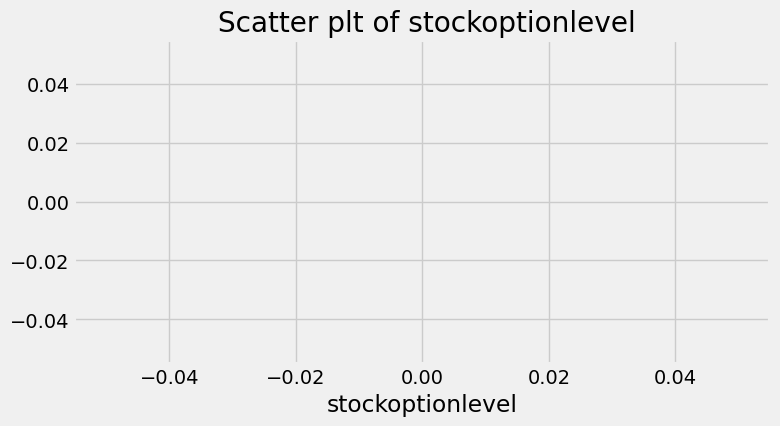

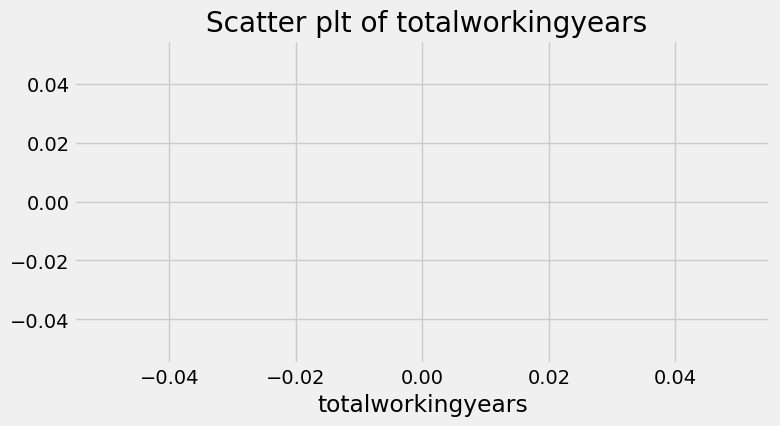

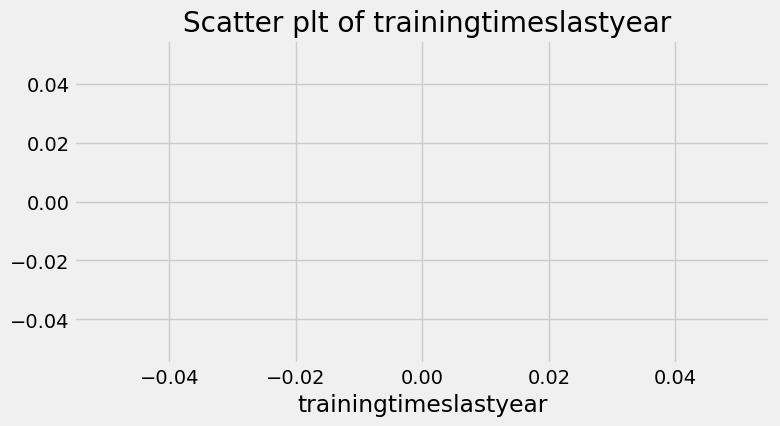

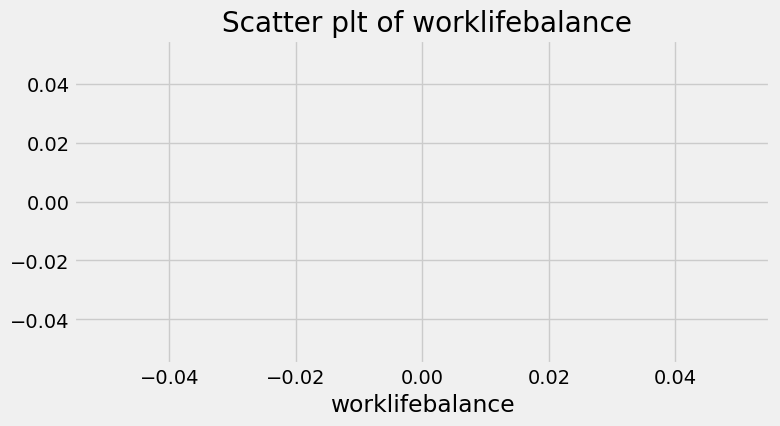

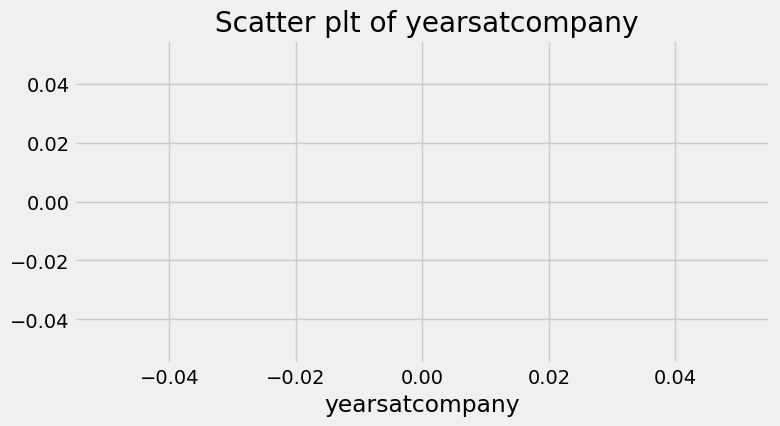

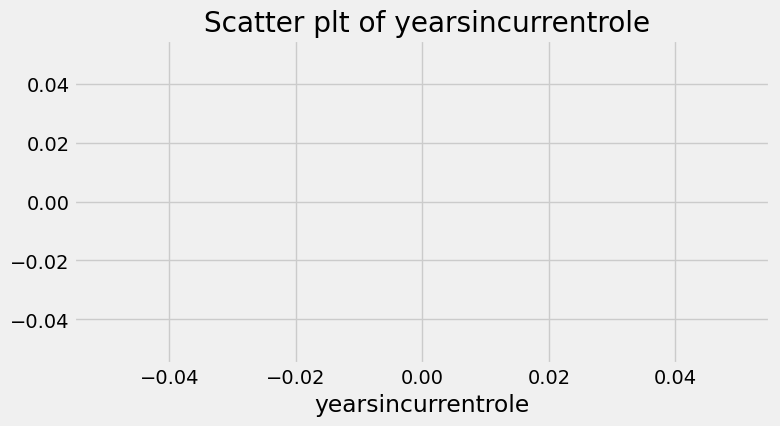

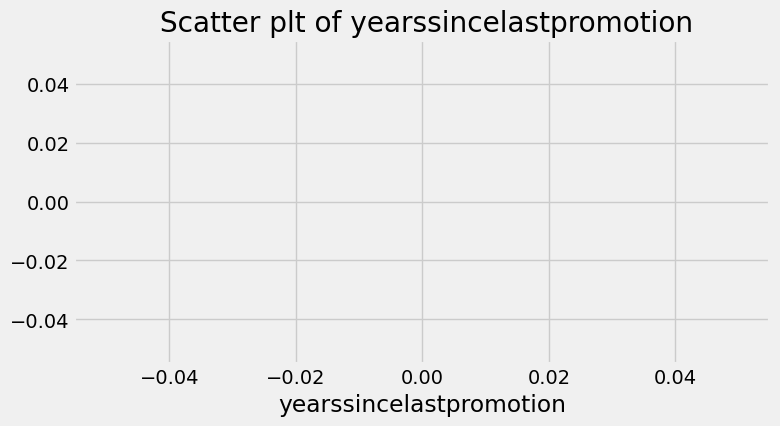

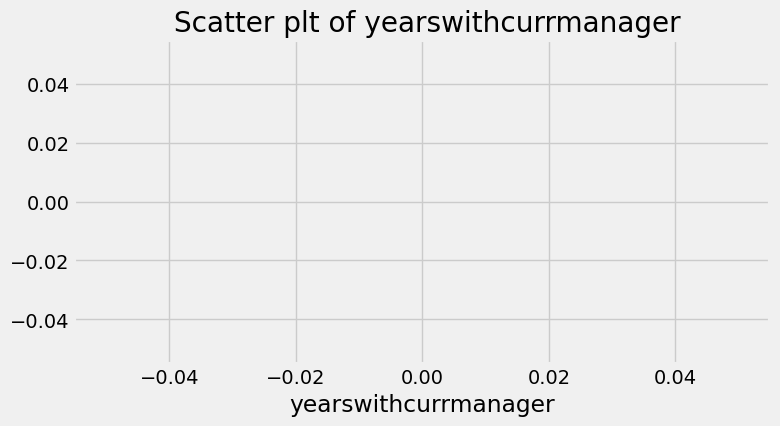

In [ ]:
# # Scatter Plot
# for c in numerical_col:
#     plt.figure(figsize=(8,4))
#     sns.scatterplot(x=df[c])
#     plt.title(f' Scatter plt of {c}')
#     plt.show()

### Handling outliers

**Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]**

In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='uniform')

transformed_data = qt.fit_transform(df[numerical_col])

df[numerical_col] = 0.25 + transformed_data * 0.5

print(df[numerical_col])



# transform = df.quantile([.25, .75], method="table", interpolation="nearest")
# print(transform)





           age  dailyrate  distancefromhome  education  employeecount  \
0     0.598599   0.603097          0.250000   0.355606           0.25   
1     0.687187   0.310991          0.527277   0.250000           0.25   
2     0.530030   0.706957          0.356607   0.355606           0.25   
3     0.435185   0.713155          0.406657   0.666166           0.25   
4     0.313313   0.426176          0.356607   0.250000           0.25   
...        ...        ...               ...        ...            ...   
1465  0.509760   0.528779          0.697948   0.355606           0.25   
1466  0.565566   0.434429          0.474975   0.250000           0.25   
1467  0.313313   0.271522          0.431932   0.501001           0.25   
1468  0.687187   0.579807          0.356607   0.501001           0.25   
1469  0.458458   0.439627          0.527277   0.501001           0.25   

      employeenumber  environmentsatisfaction  hourlyrate  jobinvolvement  \
0           0.250000                 0.395395 

In [ ]:
df = pd.read_csv("/content/wa_fn_usec_hr_employee_attrition_tsv.csv")
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("Data after handling outliers:\n", df[numerical_cols])

Data after handling outliers:
       age  dailyrate  distancefromhome  education  employeecount  \
0      41       1102                 1          2              1   
1      49        279                 8          1              1   
2      37       1373                 2          2              1   
3      33       1392                 3          4              1   
4      27        591                 2          1              1   
...   ...        ...               ...        ...            ...   
1465   36        884                23          2              1   
1466   39        613                 6          1              1   
1467   27        155                 4          3              1   
1468   49       1023                 2          3              1   
1469   34        628                 8          3              1   

      employeenumber  environmentsatisfaction  hourlyrate  jobinvolvement  \
0                  1                        2          94               3  

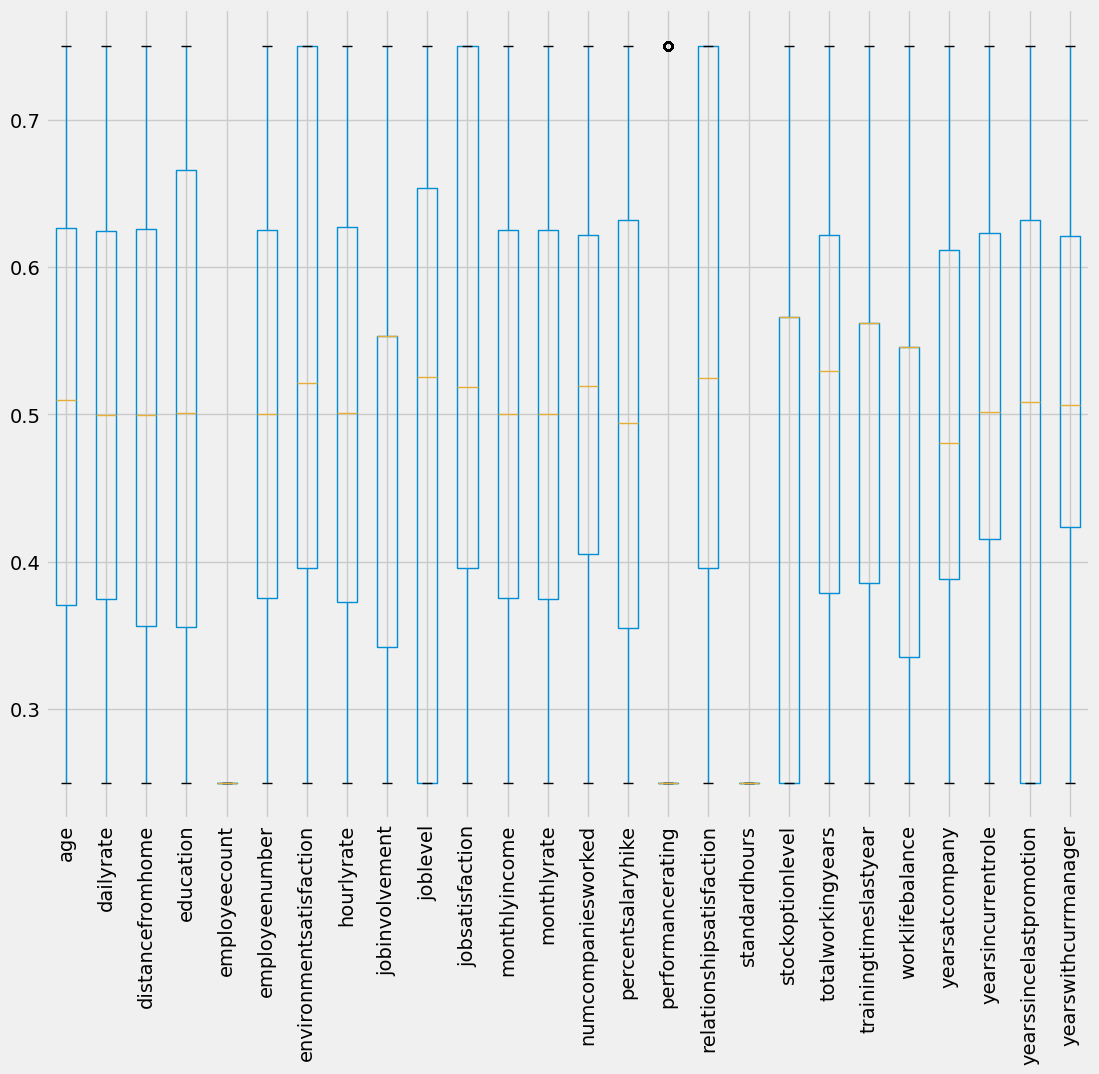

In [ ]:
# Recheck for outliers
# YOUR CODE HERE
# for c in numerical_col:
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(x=df[c])
#     plt.title(f'Box plot of {c}')
#     plt.show()


boxplot = df.boxplot(rot = 90, figsize=(12,10))
plt.show()

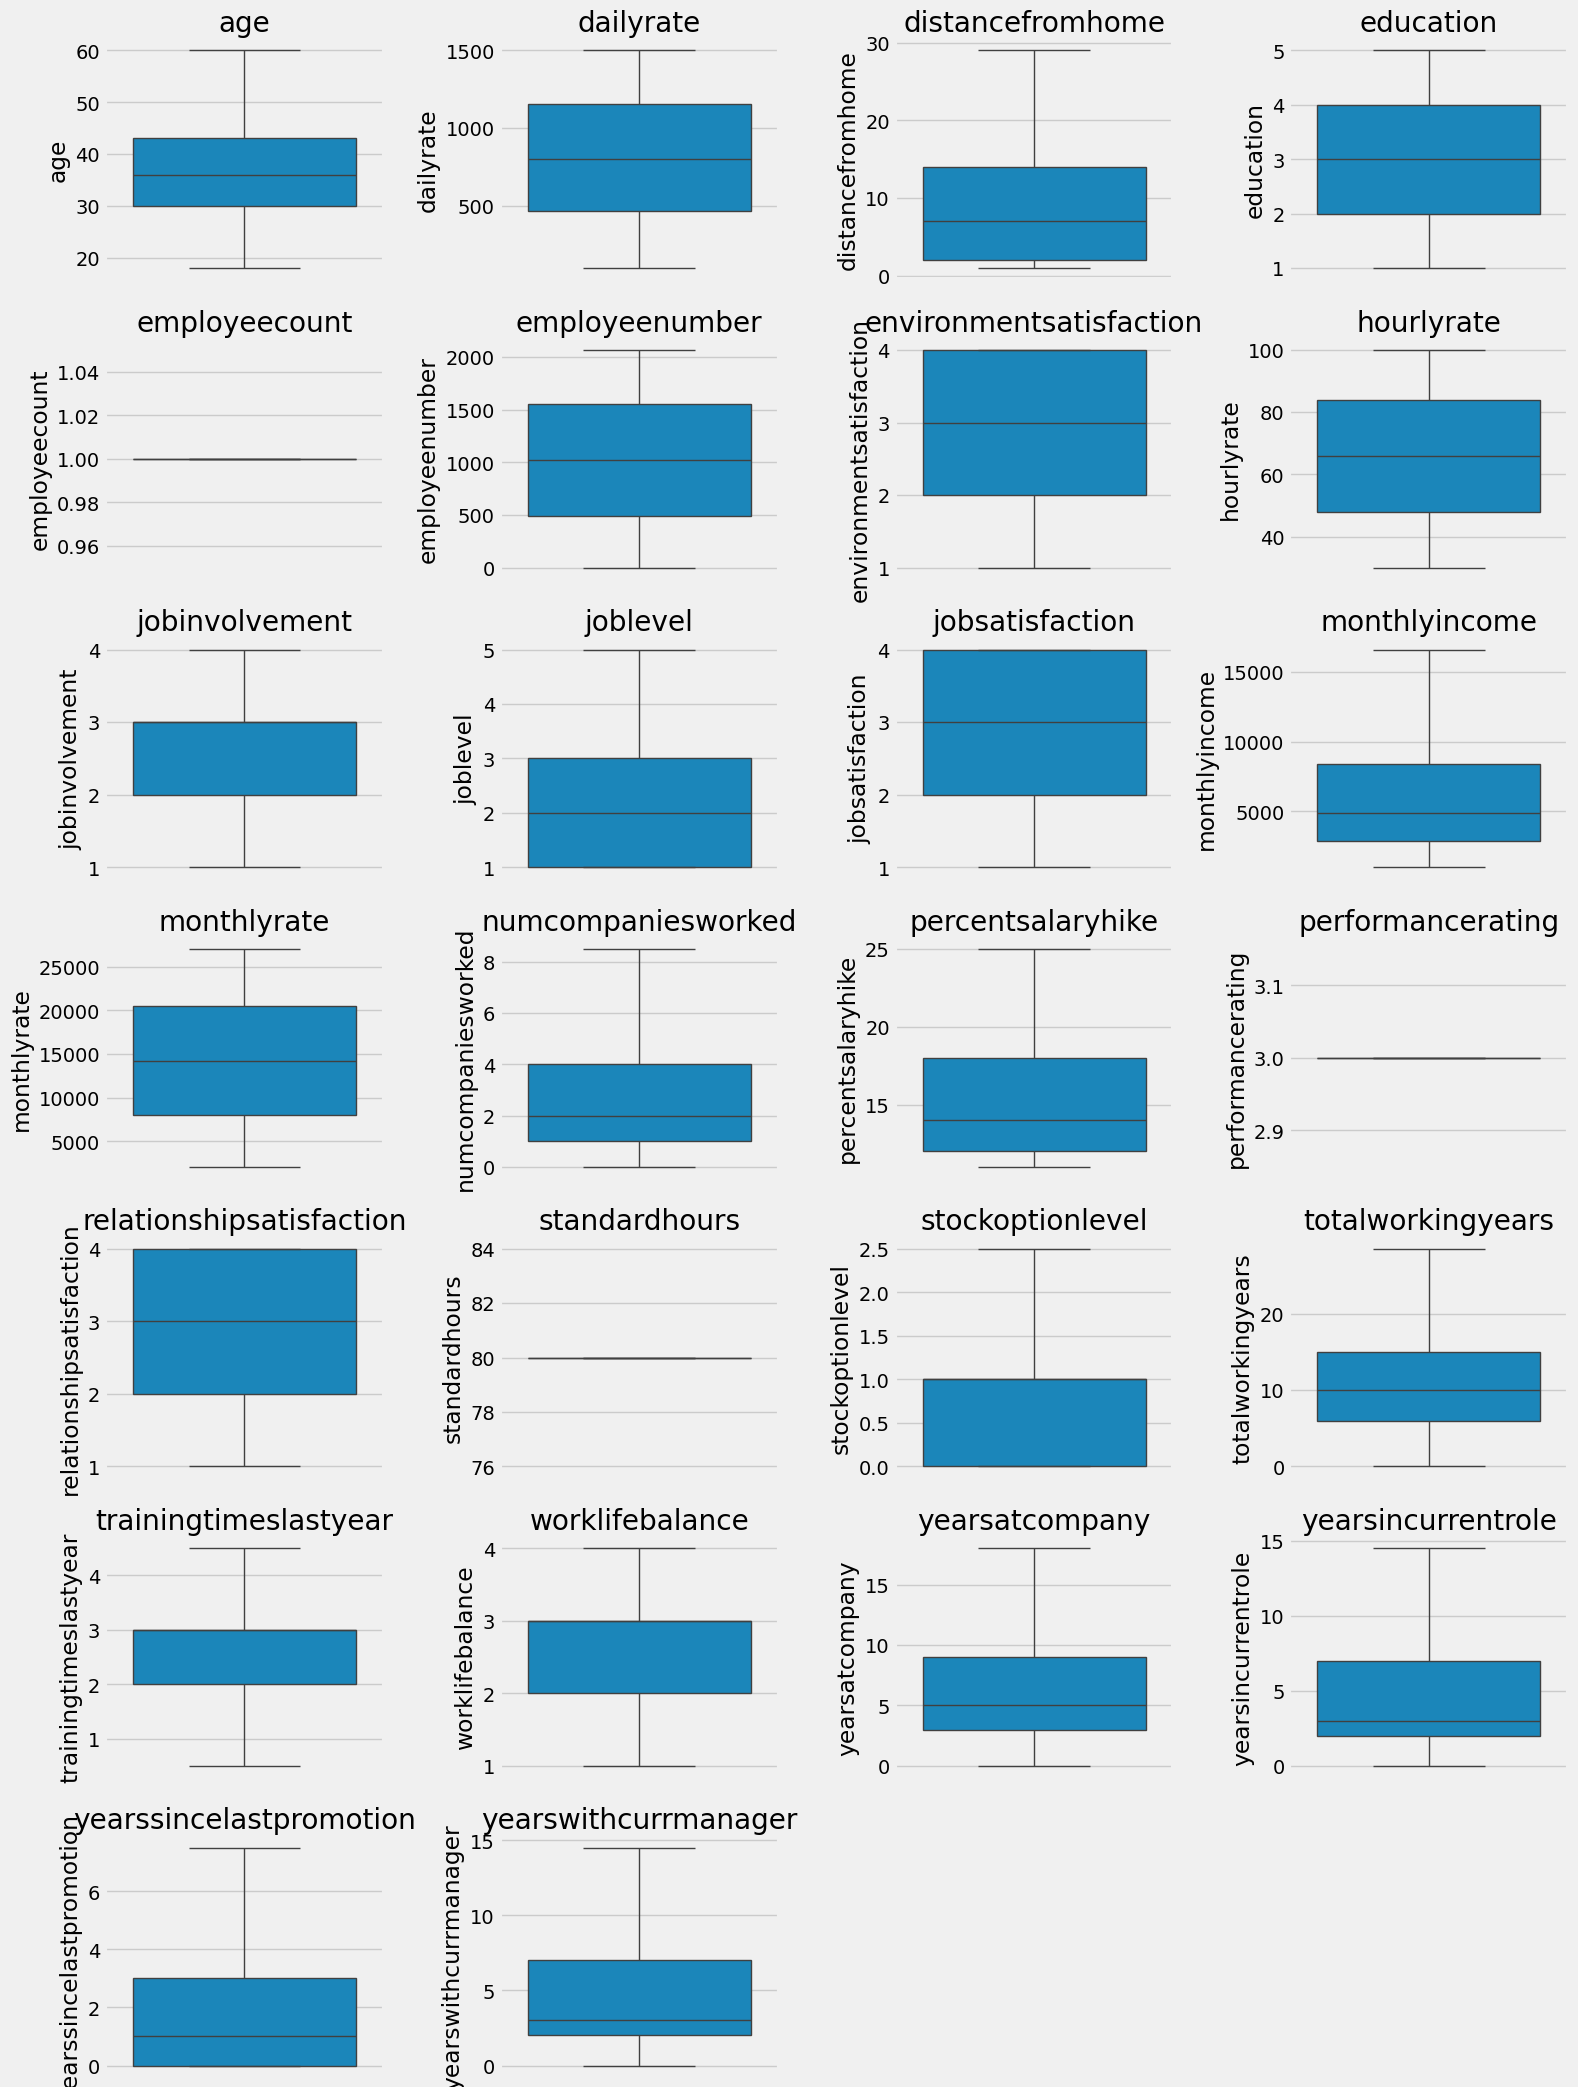

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

num_cols = 4  # Number of columns in the grid
num_rows = (len(numerical_cols) + num_cols - 1)

plt.figure(figsize=(num_cols * 4, num_rows * 3))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.00,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.00,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.500009,0.500003,0.495107,0.496930,0.25,0.500000,0.513683,0.499998,0.501650,0.466460,0.514650,0.500005,0.500001,0.495786,0.494931,0.326871,0.512783,0.25,0.454828,0.500009,0.500171,0.501912,0.499756,0.493076,0.461051,0.492012
std,0.144415,0.144480,0.151855,0.144046,0.00,0.144484,0.182067,0.144594,0.133174,0.178282,0.183789,0.144482,0.144487,0.148501,0.151631,0.180412,0.180032,0.00,0.185090,0.144173,0.139167,0.132396,0.144381,0.153115,0.182800,0.154806
min,0.250000,0.250000,0.250000,0.250000,0.25,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.25,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000
25%,0.370871,0.374875,0.356607,0.355606,0.25,0.375085,0.395395,0.372623,0.341842,0.250000,0.395896,0.375125,0.374942,0.405405,0.354855,0.250000,0.395395,0.25,0.250000,0.378629,0.385636,0.335586,0.387888,0.415415,0.250000,0.423674
50%,0.509760,0.499917,0.499249,0.501001,0.25,0.499984,0.521271,0.501251,0.553554,0.525526,0.518519,0.499988,0.499980,0.519019,0.493994,0.250000,0.525025,0.25,0.566066,0.529780,0.562062,0.546046,0.480731,0.501752,0.508509,0.506507
75%,0.626627,0.624625,0.625626,0.666166,0.25,0.625000,0.750000,0.627503,0.553554,0.653403,0.750000,0.625148,0.624953,0.621622,0.632132,0.250000,0.750000,0.25,0.566066,0.622122,0.562062,0.546046,0.611862,0.622873,0.632132,0.621121
max,0.750000,0.750000,0.750000,0.750000,0.25,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.25,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000


### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [ ]:
# Count of unique values in Attrition column
# YOUR CODE HERE
df['attrition'].value_counts()

,count
attrition,
No,1233
Yes,237


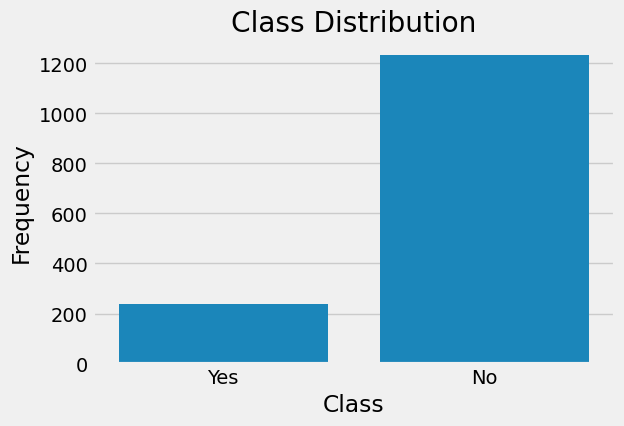

In [ ]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HERE
plt.figure(figsize=(6, 4))  # Set figure size
sns.countplot(x=df['attrition'])  # Create a count plot (bar plot) for class distribution

# Add title and labels
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Display the plot
plt.show()

If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

In [ ]:
# Visualize a pairplot with relevant features
# YOUR CODE HERE
target = df['attrition']
# print(target)
# sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"], height=2.5)

if 'attrition' not in df.columns:
    print("Error: Target variable 'target' not found in the DataFrame")
else:
    # Create a pairplot with only numeric columns
    sns.pairplot(df, hue="attrition", diag_kind='kde')

    # Display the plot
    plt.show()

# Display the plot
# plt.show()

KeyboardInterrupt: 

In [ ]:
# sns.pairplot?

In [ ]:
sns.pairplot(df, hue="attrition", diag_kind='kde')

In [ ]:
for x in numerical_cols :
    list1 = [x,'attrition']
    sns.pairplot(df[list1], x_vars =x, y_vars='attrition',hue='attrition', diag_kind='kde')
    plt.show()

# sns.pairplot(pairplot_data, hue="attrition")


### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

Alternative Approaches

In [ ]:
# Visualize heatmap
# YOUR CODE HERE
numerical_col = df.select_dtypes(include=['float64', 'int64'])
numerical_col.head(10)

# numerical_col[:4]

reduced_data = numerical_col[ : 4]


# corr_matrix = numerical_col.corr()

corr_matrix = reduced_data.corr()

# Set the size of the heatmap
plt.figure(figsize=(20, 16))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap of Numerical Features in IBM Employee Attrition')

# Show the heatmap
plt.show()

Comment on the observations made with the pairplot and heatmap

# Part-B

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

In [ ]:
# YOUR CODE HERE
df.head(10)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,0.598599,Yes,Travel_Rarely,0.603097,Sales,0.250000,0.355606,Life Sciences,0.25,0.250000,0.395395,Female,0.699449,0.553554,0.525526,Sales Executive,0.750000,Single,0.560459,0.601622,0.723974,Y,Yes,0.250000,0.25,0.250000,0.25,0.250000,0.444945,0.250000,0.250000,0.526777,0.542543,0.250000,0.569319
1,0.687187,No,Travel_Frequently,0.310991,Research & Development,0.527277,0.250000,Life Sciences,0.25,0.250258,0.521271,Male,0.466717,0.341842,0.525526,Research Scientist,0.395896,Married,0.511757,0.716415,0.405405,Y,No,0.732232,0.75,0.750000,0.25,0.566066,0.529780,0.562062,0.546046,0.645896,0.622873,0.508509,0.621121
2,0.530030,Yes,Travel_Rarely,0.706957,Research & Development,0.356607,0.355606,Other,0.25,0.250766,0.750000,Male,0.685936,0.341842,0.250000,Laboratory Technician,0.518519,Single,0.273424,0.256437,0.678679,Y,Yes,0.545546,0.25,0.395395,0.25,0.250000,0.413664,0.562062,0.546046,0.250000,0.250000,0.250000,0.250000
3,0.435185,No,Travel_Frequently,0.713155,Research & Development,0.406657,0.666166,Life Sciences,0.25,0.251013,0.750000,Female,0.428679,0.553554,0.250000,Research Scientist,0.518519,Married,0.374548,0.681931,0.405405,Y,Yes,0.250000,0.25,0.525025,0.25,0.250000,0.444945,0.562062,0.546046,0.584084,0.622873,0.632132,0.250000
4,0.313313,No,Travel_Rarely,0.426176,Research & Development,0.356607,0.250000,Medical,0.25,0.251418,0.250000,Male,0.311812,0.553554,0.250000,Laboratory Technician,0.395896,Married,0.408591,0.548834,0.750000,Y,No,0.354855,0.25,0.750000,0.25,0.566066,0.378629,0.562062,0.546046,0.344595,0.415415,0.596096,0.423674
5,0.415165,No,Travel_Frequently,0.575075,Research & Development,0.356607,0.355606,Life Sciences,0.25,0.251627,0.750000,Male,0.590340,0.553554,0.250000,Laboratory Technician,0.750000,Single,0.388174,0.451684,0.250000,Y,No,0.424174,0.25,0.525025,0.25,0.250000,0.444945,0.385636,0.335586,0.555055,0.622873,0.632132,0.579329
6,0.746747,No,Travel_Rarely,0.687357,Research & Development,0.406657,0.501001,Medical,0.25,0.252076,0.521271,Female,0.605856,0.750000,0.250000,Laboratory Technician,0.250000,Married,0.345973,0.414277,0.621622,Y,Yes,0.682432,0.75,0.250000,0.25,0.750000,0.584585,0.562062,0.335586,0.293794,0.250000,0.250000,0.250000
7,0.370871,No,Travel_Rarely,0.701015,Research & Development,0.707207,0.250000,Life Sciences,0.25,0.252391,0.750000,Male,0.509510,0.553554,0.250000,Laboratory Technician,0.518519,Divorced,0.349002,0.480204,0.405405,Y,No,0.717968,0.75,0.395395,0.25,0.566066,0.267267,0.385636,0.546046,0.293794,0.250000,0.250000,0.250000
8,0.548298,No,Travel_Frequently,0.291792,Research & Development,0.697948,0.501001,Life Sciences,0.25,0.252723,0.750000,Male,0.342843,0.341842,0.653403,Manufacturing Director,0.518519,Single,0.642395,0.387168,0.250000,Y,No,0.700200,0.75,0.395395,0.25,0.250000,0.529780,0.385636,0.546046,0.611862,0.622873,0.508509,0.676176
9,0.509760,No,Travel_Rarely,0.675509,Research & Development,0.730981,0.501001,Medical,0.25,0.253063,0.521271,Male,0.699449,0.553554,0.525526,Healthcare Representative,0.518519,Married,0.519110,0.547099,0.678679,Y,No,0.424174,0.25,0.395395,0.25,0.694444,0.647147,0.562062,0.335586,0.555055,0.622873,0.700951,0.621121


Optional:
Use `Hyperopt`, a hyperparameter tuning technique to identify the best set of parameters.

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance.

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Column containing the information on attrition will be the target column.

In [ ]:
df_catboost = df.copy()
print(df_catboost.dtypes)

age                         float64
attrition                    object
businesstravel               object
dailyrate                   float64
department                   object
distancefromhome            float64
education                   float64
educationfield               object
employeecount               float64
employeenumber              float64
environmentsatisfaction     float64
gender                       object
hourlyrate                  float64
jobinvolvement              float64
joblevel                    float64
jobrole                      object
jobsatisfaction             float64
maritalstatus                object
monthlyincome               float64
monthlyrate                 float64
numcompaniesworked          float64
over18                       object
overtime                     object
percentsalaryhike           float64
performancerating           float64
relationshipsatisfaction    float64
standardhours               float64
stockoptionlevel            

In [ ]:
# Identify categorical columns
categorical_features = df_catboost.select_dtypes(include=['object']).columns.drop('attrition').tolist()
print(f'Categorical Columns -- \n{categorical_features}')# Target Column

y = df_catboost[['attrition']]
print(f'Target ---->> \n{y.head()}')
# YOUR CODE HERE

Categorical Columns -- 
['businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'over18', 'overtime']
Target ---->> 
  attrition
0       Yes
1        No
2       Yes
3        No
4        No


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

In [ ]:
# Feature Space
X = df_catboost.drop('attrition', axis=1)
print(f'Features ---->> {X.head()}')

Features ---->>         age     businesstravel  dailyrate              department  \
0  0.598599      Travel_Rarely   0.603097                   Sales   
1  0.687187  Travel_Frequently   0.310991  Research & Development   
2  0.530030      Travel_Rarely   0.706957  Research & Development   
3  0.435185  Travel_Frequently   0.713155  Research & Development   
4  0.313313      Travel_Rarely   0.426176  Research & Development   

   distancefromhome  education educationfield  employeecount  employeenumber  \
0          0.250000   0.355606  Life Sciences           0.25        0.250000   
1          0.527277   0.250000  Life Sciences           0.25        0.250258   
2          0.356607   0.355606          Other           0.25        0.250766   
3          0.406657   0.666166  Life Sciences           0.25        0.251013   
4          0.356607   0.250000        Medical           0.25        0.251418   

   environmentsatisfaction  gender  hourlyrate  jobinvolvement  joblevel  \
0           

### Model Definition

**Exercise 9: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create CatBoost model
# YOUR CODE HERE
catboost_model = CatBoostClassifier(iterations=20, random_seed=37, logging_level='Silent', loss_function='Logloss')

In [ ]:
catboost_model.fit(X_train, y_train, cat_features=categorical_features, eval_set=(X_test, y_test))

### Model performance

In [ ]:
catboost_model.score(X_test, y_test)

# Prediction
y_pred = catboost_model.predict(X_test)
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1] # For yes

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Calculate Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Calculate F1 Score
f1 = f1_score(y_test, y_pred, pos_label='Yes')
print(f"F1 Score: {f1:.4f}")

ROC AUC Score: 0.8234
Accuracy Score: 0.8537
F1 Score: 0.1569


## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


**Exercise 10: Data Processing for XGBoost [1 Mark]**
* **Copy the dataframe after the outliers were removed.**
* **Handle the categorical features if required**
* **Create target column and feature space**

In [ ]:
# Copy dataframe
df_xgboost = df.copy()
print(f'Data frame shape ---> {df_xgboost.shape}')

print(f'Data frame info ---> \n{df_xgboost.describe}')

print(f'Data Types ---> \n{df_xgboost.dtypes}')

print(f'{df_xgboost}')

Data frame shape ---> (1470, 35)
Data frame info ---> 
<bound method NDFrame.describe of            age attrition     businesstravel  dailyrate  \
0     0.598599       Yes      Travel_Rarely   0.603097   
1     0.687187        No  Travel_Frequently   0.310991   
2     0.530030       Yes      Travel_Rarely   0.706957   
3     0.435185        No  Travel_Frequently   0.713155   
4     0.313313        No      Travel_Rarely   0.426176   
...        ...       ...                ...        ...   
1465  0.509760        No  Travel_Frequently   0.528779   
1466  0.565566        No      Travel_Rarely   0.434429   
1467  0.313313        No      Travel_Rarely   0.271522   
1468  0.687187        No  Travel_Frequently   0.579807   
1469  0.458458        No      Travel_Rarely   0.439627   

                  department  distancefromhome  education educationfield  \
0                      Sales          0.250000   0.355606  Life Sciences   
1     Research & Development          0.527277   0.250000  Lif

**Hint:** Use pd.get_dummies

In [ ]:
cat_features = df_xgboost.select_dtypes(include=['O']).columns.tolist()
print(cat_features)
# c= ['attrition', 'businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'over18', 'overtime']


# for one hot encoding
dummies = pd.get_dummies(df_xgboost, columns=cat_features, drop_first=True, dtype='float')

print(f'shape ---> {dummies.shape}')

dummies.head()


['attrition', 'businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'over18', 'overtime']
shape ---> (1470, 48)


,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition_Yes,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Research & Development,department_Sales,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Male,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Married,maritalstatus_Single,overtime_Yes
0,0.598599,0.603097,0.250000,0.355606,0.25,0.250000,0.395395,0.699449,0.553554,0.525526,0.750000,0.560459,0.601622,0.723974,0.250000,0.25,0.250000,0.25,0.250000,0.444945,0.250000,0.250000,0.526777,0.542543,0.250000,0.569319,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.687187,0.310991,0.527277,0.250000,0.25,0.250258,0.521271,0.466717,0.341842,0.525526,0.395896,0.511757,0.716415,0.405405,0.732232,0.75,0.750000,0.25,0.566066,0.529780,0.562062,0.546046,0.645896,0.622873,0.508509,0.621121,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.530030,0.706957,0.356607,0.355606,0.25,0.250766,0.750000,0.685936,0.341842,0.250000,0.518519,0.273424,0.256437,0.678679,0.545546,0.25,0.395395,0.25,0.250000,0.413664,0.562062,0.546046,0.250000,0.250000,0.250000,0.250000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.435185,0.713155,0.406657,0.666166,0.25,0.251013,0.750000,0.428679,0.553554,0.250000,0.518519,0.374548,0.681931,0.405405,0.250000,0.25,0.525025,0.25,0.250000,0.444945,0.562062,0.546046,0.584084,0.622873,0.632132,0.250000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.313313,0.426176,0.356607,0.250000,0.25,0.251418,0.250000,0.311812,0.553554,0.250000,0.395896,0.408591,0.548834,0.750000,0.354855,0.25,0.750000,0.25,0.566066,0.378629,0.562062,0.546046,0.344595,0.415415,0.596096,0.423674,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_dummies = pd.concat([df_xgboost, dummies], axis=1)
# df_dummies
print(df_dummies.shape)
df_final = df_dummies.drop(columns=cat_features, axis=1)
# df_final
df_final.shape

(1470, 83)


(1470, 74)

When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

**Hint:** Use .rename

In [ ]:
df_final.columns.tolist()
df_final = df_final.loc[:, ~df_final.columns.duplicated()]
df_final.head(10)
df_final.rename(columns={'attrition_Yes': 'attrition'}, inplace=True)
X = df_final.drop('attrition', axis=1)
print(f'Features ---->> {X.head()}')


# Target label
# YOUR CODE HERE
y = df_final[['attrition']]
print(f'Target ---->> \n{y.head()}')

Features ---->>         age  dailyrate  distancefromhome  education  employeecount  \
0  0.598599   0.603097          0.250000   0.355606           0.25   
1  0.687187   0.310991          0.527277   0.250000           0.25   
2  0.530030   0.706957          0.356607   0.355606           0.25   
3  0.435185   0.713155          0.406657   0.666166           0.25   
4  0.313313   0.426176          0.356607   0.250000           0.25   

   employeenumber  environmentsatisfaction  hourlyrate  jobinvolvement  \
0        0.250000                 0.395395    0.699449        0.553554   
1        0.250258                 0.521271    0.466717        0.341842   
2        0.250766                 0.750000    0.685936        0.341842   
3        0.251013                 0.750000    0.428679        0.553554   
4        0.251418                 0.250000    0.311812        0.553554   

   joblevel  jobsatisfaction  monthlyincome  monthlyrate  numcompaniesworked  \
0  0.525526         0.750000       0.5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=37)

X_train, y_train

(           age  dailyrate  distancefromhome  education  employeecount  \
 758   0.746747   0.596346          0.250000   0.355606           0.25   
 1246  0.370871   0.429374          0.527277   0.501001           0.25   
 445   0.730480   0.609109          0.660410   0.750000           0.25   
 991   0.415165   0.387168          0.356607   0.250000           0.25   
 1092  0.650400   0.553053          0.736987   0.501001           0.25   
 ...        ...        ...               ...        ...            ...   
 437   0.370871   0.356195          0.499249   0.250000           0.25   
 988   0.598599   0.640390          0.690190   0.501001           0.25   
 251   0.565566   0.389536          0.356607   0.666166           0.25   
 844   0.370871   0.518519          0.584585   0.501001           0.25   
 363   0.435185   0.338839          0.453954   0.501001           0.25   
 
       employeenumber  environmentsatisfaction  hourlyrate  jobinvolvement  \
 758         0.507999           

### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use XGBClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
xgboost_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=37,
    eval_metric='logloss',
    use_label_encoder=True
)

In [ ]:
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=37, ...)

### Model Performance

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

# Predict on test data
y_xgboost_pred = xgboost_model.predict(X_test)

# If using probabilities for ROC-AUC score
y_xgboost_pred_proba = xgboost_model.predict_proba(X_test)[:, 1]  # Probability for positive class

# Accuracy
accuracy_xgboost = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_xgboost)

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC-AUC Score (for binary classification)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Full Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8605442176870748
Precision: 0.6923076923076923
Recall: 0.1956521739130435
F1 Score: 0.3050847457627119
Confusion Matrix:
 [[244   4]
 [ 37   9]]
ROC-AUC Score: 0.7734046283309958
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       248
         1.0       0.69      0.20      0.31        46

    accuracy                           0.86       294
   macro avg       0.78      0.59      0.61       294
weighted avg       0.84      0.86      0.83       294



## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

In [ ]:
## Following the same procedure as followed in XGBoost

# Copy the dataframe
# YOUR CODE HERE

# Handling categorical features
# YOUR CODE HERE

# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

# Rename target column
# YOUR CODE HERE

# Features Space
# YOUR CODE HERE

# Target Label
# YOUR CODE HERE

### Model Definition

**Hint:**
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create LightGBM classifier model
# YOUR CODE HERE

In [ ]:
# Model training
# YOUR CODE HERE

### Model performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE

## Results

**Exercise 12: Create a dataframe of XGBoost results and CatBoost results and display them [0.5 Mark]**

**Hint:** Use pd.DataFrame

In [ ]:
import pandas as pd

# Ensure y_test is one-dimensional
y_test = y_test.values.ravel() if isinstance(y_test, pd.DataFrame) else y_test

# Create DataFrame to compare results
results_df = pd.DataFrame({
    'True Label': y_test,
    'XGBoost Prediction': y_xgboost_pred,
    'XGBoost Probability (Positive Class)': y_xgboost_pred_proba,
    'CatBoost Prediction': y_pred,
    'CatBoost Probability (Positive Class)': y_pred_proba
})

# Display the DataFrame and any accuracy scores
print(results_df.head())


   True Label  XGBoost Prediction  XGBoost Probability (Positive Class)  \
0         0.0                   0                              0.241201   
1         0.0                   0                              0.181906   
2         1.0                   0                              0.061228   
3         0.0                   0                              0.038840   
4         0.0                   0                              0.026290   

   CatBoost Prediction  CatBoost Probability (Positive Class)  
0                    0                               0.241201  
1                    0                               0.181906  
2                    0                               0.061228  
3                    0                               0.038840  
4                    0                               0.026290  


Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/